<a href="https://colab.research.google.com/github/claudiaesnarrizaga/PROCESAMIENTO-MULTIMEDIA/blob/main/Pr%C3%A1ctica_II_Procesamiento_de_V%C3%ADdeo_tenis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA 2. Procesamiento de Vídeo con Python y OpenCV**

## **ENUNCIADO**



En esta práctica, se te solicita desarrollar un programa en Python utilizando la biblioteca OpenCV para realizar procesamiento de video. El objetivo es aplicar diferentes técnicas de procesamiento de imágenes en tiempo real a un archivo de video.

**Requisitos**

* Utilizar Python 3 y la biblioteca OpenCV para el desarrollo del programa.
* Aplicar al menos tres técnicas diferentes de procesamiento de imágenes, como detección de bordes, segmentación, seguimiento de objetos, entre otros. Puedes elegir las técnicas que consideres más apropiadas para tu proyecto. Validarlo antes conmigo.
* Implementar una interfaz de usuario amigable que permita al usuario seleccionar el archivo de video a procesar y visualizar el resultado del procesamiento en tiempo real.
* Entregar el código fuente del programa en un archivo Python con extensión .py.
* Incluir un informe detallado que describa las técnicas utilizadas, los resultados obtenidos y las conclusiones. El informe debe estar en formato PDF.
* Adjuntar al menos dos de referencia que muestren el antes y después procesamiento aplicar al video original. Los videos deben tener una duración mínima de 10 segundos cada uno y estar en formato .mp4.

## **INTRODUCCIÓN**



En esta práctica se desarrollará un programa en Python utilizando la biblioteca `OpenCV`para realizar procesamiento de vídeo.

## **OBJETIVOS**



### **Objetivo principal**



Desarrollar un programa en Python utilizando la biblioteca `OpenCV`para aplicar técnicas de procesamiento de imágenes en tiempo real sobre un vídeo de un jugador de tenis, con el fin de detectar y realizar seguimiento de objetos específicos, como la pelota, la camiseta, los pantalones y la raqueta.

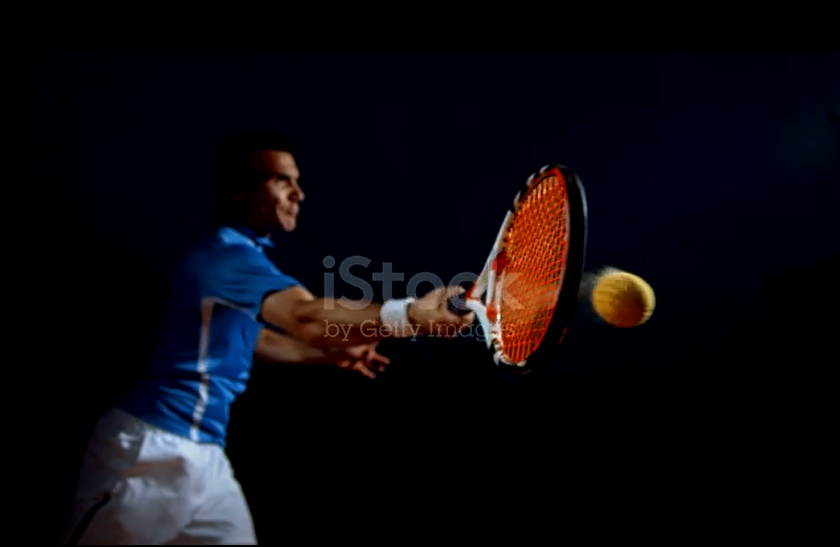


### **Objetivos específicos**



1. **Implementar técnicas de procesamiento de imágenes para detectar y realizar seguimiento de la camiseta del jugador de tenis** utilizando umbralización por color y operaciones morfológicas para mejorar la precisión de la detección.

2. **Detectar y realizar seguimiento de los pantalones del jugador**, empleando técnicas de segmentación basadas en color para distinguirlos del resto del entorno del vídeo.

3. **Identificar y realizar seguimiento de la pelota de tenis** durante el vídeo, optimizando los rangos de color y aplicando operaciones morfológicas para asegurar una detección precisa, incluso cuando la pelota se mueve rápidamente y puede haber difuminación.

4. **Detectar y realizar seguimiento de la raqueta de tenis**, aplicando umbralización por color y técnicas adicionales para diferenciarla claramente del fondo.

5. **Visualizar el procesamiento en tiempo real mediante una interfaz de usuario**, que permita al usuario seleccionar el video a procesar y observar cómo los diferentes objetos (camiseta, pantalones, pelota y raqueta) son detectados y seguidos en cada frame.

6. **Calcular la precisión de la detección para cada uno de los objetos** comparando el área detectada con un valor de referencia, y mostrar esta información en pantalla para evaluar la calidad del procesamiento.

## **DESCRIPCIÓN DEL VÍDEO**

El video utilizado para este proyecto es un archivo llamado "pelota.mp4", que muestra a un jugador de tenis, Roger Federer, golpeando una pelota de tenis. El video tiene una duración de aproximadamente 15 segundos y está en formato MP4, con una resolución de 1920x1080 píxeles (Full HD). Este tipo de contenido fue seleccionado por la dinámica del movimiento del jugador y los objetos que se encuentran en constante desplazamiento, lo cual resulta ideal para aplicar y poner a prueba diferentes técnicas de procesamiento de imágenes en tiempo real.

El video presenta condiciones de iluminación relativamente uniformes, pero también contiene variaciones debido a la velocidad del juego y la complejidad de los movimientos del jugador y los objetos. Estos factores representan desafíos adicionales para el procesamiento de imágenes, ya que requieren de técnicas robustas para identificar y seguir objetos a pesar de la variabilidad del entorno.

### **Objetivos del procesamiento**

Los objetivos del procesamiento se centran en la detección y seguimiento de cuatro elementos principales dentro del video:

1. **Camiseta del jugador**: la camiseta de Roger Federer es de color azul y se seleccionó como uno de los objetivos para el procesamiento por su buena visibilidad y contraste con el fondo, lo que permite un seguimiento más preciso del jugador.

2. **Pantalones del jugador**: los pantalones del jugador, que son de color blanco o gris, también fueron elegidos como un objeto a detectar. La combinación de la camiseta y los pantalones permite un seguimiento más completo del jugador.

3. **Pelota de tenis**: La pelota de tenis es de color amarillo y es uno de los elementos más pequeños y veloces de la escena. La detección de la pelota resulta esencial para comprender el movimiento y las acciones clave durante el partido. Sin embargo, la velocidad de la pelota representa un desafío significativo para su seguimiento.

**Raqueta de tenis**: La raqueta, de color rojo, fue seleccionada debido a su importancia en la acción del juego y al hecho de que presenta un contraste claro con el fondo. El seguimiento de la raqueta permite analizar el movimiento preciso del jugador durante el partido.

La selección de estos objetos se debió a su relevancia en el contexto de un partido de tenis. La detección precisa de estos elementos es fundamental para analizar el rendimiento del jugador, su interacción con los objetos y la dinámica del partido. Se han aplicado diferentes técnicas de procesamiento de imágenes en tiempo real, como la umbralización por color, operaciones morfológicas y la detección de contornos, para lograr la detección y el seguimiento de cada uno de estos elementos.

Cada uno de estos objetivos de detección presenta desafíos específicos, como la rapidez y tamaño de la pelota o la variabilidad en la posición de la raqueta, lo que requiere un ajuste cuidadoso de los parámetros y técnicas de procesamiento para alcanzar una detección robusta y precisa.



## **TÉCNICAS DE PROCESAMIENTO APLICADAS**

Para alcanzar los objetivos de detección y seguimiento de los diferentes elementos del video ("pelota.mp4"), se utilizaron varias técnicas de procesamiento de imágenes en tiempo real. Estas técnicas permitieron detectar objetos específicos como la camiseta, los pantalones, la pelota de tenis y la raqueta. A continuación, se detallan las técnicas utilizadas y cómo se aplicaron:

### **1. Conversión a Espacio de Color HSV**


La primera técnica utilizada fue la conversión del espacio de color de cada frame del video, de BGR (el formato utilizado por OpenCV) a HSV (Hue, Saturation, Value). Esta conversión facilita la segmentación de colores, ya que el espacio HSV separa la información del color (tono) de la intensidad, lo cual resulta útil para una detección más precisa de los elementos.

Por qué HSV: En el espacio HSV, el matiz (Hue) describe el color básico, la saturación (Saturation) define la intensidad del color y el valor (Value) corresponde al brillo. Esto permite definir rangos de colores que son menos afectados por variaciones de iluminación, facilitando la detección de objetos como la camiseta azul o la pelota amarilla, que tienen colores característicos que los diferencian del fondo.



Para obtener un código exacto de los colores que aparecen en el vídeo, se ha investigado y encontrado una página web (https://imagecolorpicker.com)  que te permite subir una foto e identificar el color por píxeles de la zona en la que pinches, además de proporcionarte una paleta de color de dicha fotografía.

A continuación se adjunta un ejemplo del color que tiene la pelota al principio del vídeo, ya que como aparece bastante más oscura no se identificaba bien hasta que el vídeo no aumentaba en brillo.

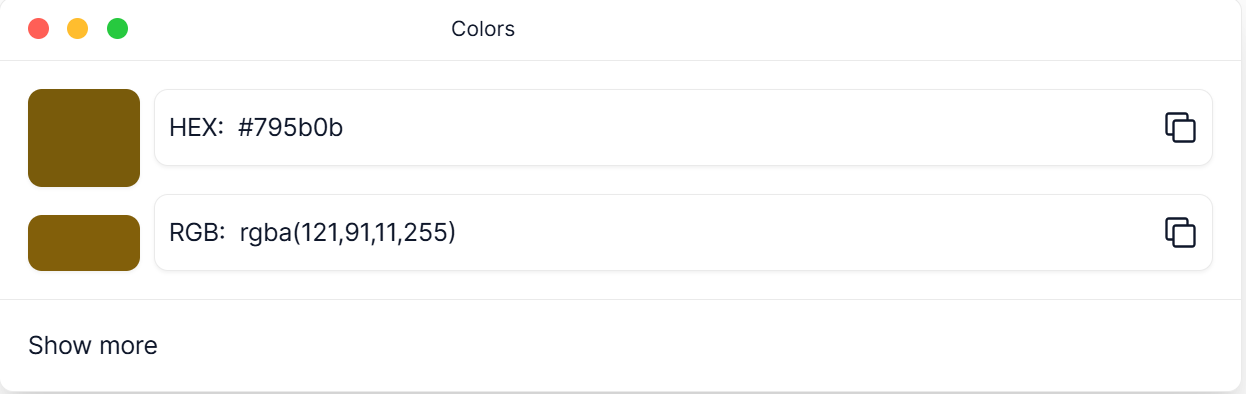

### **2. Filtrado por Color (Umbralización)**

Para la detección de objetos específicos, se utilizó la técnica de umbralización por color en el espacio HSV. Se definieron rangos de colores específicos para cada uno de los objetos que se deseaban detectar:

- Pelota de tenis (amarillos/marrones): Se definieron los límites del color en HSV para crear una máscara que resalte la pelota y la separe del resto del entorno.

- Camiseta del jugador (azules/negros): Se utilizó un rango que cubre los tonos azules presentes en la camiseta del jugador, lo que permitió detectar y seguir la camiseta a lo largo de todo el video.

- Pantalones (blancos/grises): Se utilizó un rango que abarca los colores claros/grises para aislar los pantalones.

- Raqueta (rojos): De igual manera, se definieron dos rangos de tonos rojos para cubrir tanto los rojos más saturados como los más oscuros, asegurando una detección constante de la raqueta.

Cada una de estas máscaras permite resaltar los objetos de interés, mientras elimina la información irrelevante del resto de la escena.

### **3. Operaciones Morfológicas**

Para mejorar la calidad de las máscaras obtenidas con la umbralización por color, se aplicaron operaciones morfológicas. Estas operaciones permitieron reducir el ruido y mejorar la detección:

- Cierre (`MORPH_CLOSE`): Se aplicó una operación de cierre para cerrar pequeños huecos dentro de las áreas detectadas, asegurando que las detecciones fuesen más sólidas y coherentes.

- Apertura (`MORPH_OPEN`): También se utilizó una operación de apertura para eliminar el ruido de las máscaras, lo que ayudó a reducir la presencia de pequeños elementos no deseados que podían ser confundidos con los objetos reales.

Estas técnicas fueron esenciales para garantizar que las áreas detectadas correspondieran a los objetos reales y no a fragmentos pequeños o ruido presente en la escena.



### **4. Detección de Contornos**

Una vez obtenidas las máscaras limpias, se utilizó la técnica de detección de contornos con la función `cv2.findContours()`. Esta función permitió identificar los bordes de las áreas segmentadas y así calcular el área y posición de los objetos de interés:

- Pelota de tenis: Dado el pequeño tamaño de la pelota, se filtraron los contornos en función de su área, asegurando que solo los contornos de tamaño adecuado fueran considerados como la pelota.

- Camiseta, pantalones y raqueta: Se utilizó la misma técnica para detectar los contornos de estos objetos, definiendo condiciones específicas para su área, lo cual permitió diferenciarlos del resto de los elementos en el video.

### **5. Cálculo de Precisión**

Para cada objeto detectado, se calculó un índice de precisión comparando el área detectada con un área de referencia predefinida. Esto se realizó con el objetivo de cuantificar cuán precisa era la detección:

Visualización en Tiempo Real: Esta precisión se mostró en pantalla mediante un cuadro delimitador y un texto que indicaba el porcentaje de precisión para cada objeto detectado. Esto fue útil para evaluar rápidamente si los parámetros de detección estaban funcionando de manera adecuada.

### **Interfaz de Usuario para la Selección del Video y Visualización**

Además de las técnicas de procesamiento de imágenes, se implementó una interfaz de usuario para permitir al usuario seleccionar el archivo de video a procesar y visualizar el resultado en tiempo real. La interfaz, desarrollada utilizando Google Colab y algunas funciones de carga y visualización (`files.upload()` y `cv2_imshow()`), proporcionó una manera amigable de interactuar con el programa sin necesidad de utilizar la línea de comandos.

## **CÓDIGO**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Para mostrar en Colab
from google.colab import files  # Para cargar archivos en Colab

def process_video_with_improved_detection():
    print("Por favor, sube tu archivo de video.")
    uploaded = files.upload()
    video_path = list(uploaded.keys())[0]
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error al abrir el video.")
        return

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    output_path = video_path.replace(".mp4", "_procesado_mejorado.mp4")
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    kernel = np.ones((5, 5), np.uint8)  # Ajustado para operaciones más precisas
    reference_areas = {
        "ball": 1200,  # Área aproximada para la pelota
        "pants": 9000,  # Área aproximada para los pantalones
        "shirt": 15000,  # Área aproximada para la camiseta
        "racket": 7000   # Área aproximada para la raqueta
    }

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Video procesado completamente.")
            break

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Detección de la pelota (amarilla)
        lower_yellow = np.array([20, 80, 80])  # Ajustado para incluir tonos más oscuros
        upper_yellow = np.array([40, 255, 255])
        mask_ball = cv2.inRange(hsv, lower_yellow, upper_yellow)
        mask_ball = cv2.morphologyEx(mask_ball, cv2.MORPH_CLOSE, kernel, iterations=2)
        contours_ball, _ = cv2.findContours(mask_ball, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        ball_accuracy = 0
        if contours_ball:
            largest_ball = max(contours_ball, key=cv2.contourArea)
            area_ball = cv2.contourArea(largest_ball)
            if 100 < area_ball < 2000:
                ball_accuracy = min(100, max(0, int((1 - abs(area_ball - reference_areas["ball"]) / reference_areas["ball"]) * 100)))
                x, y, w, h = cv2.boundingRect(largest_ball)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, f"Pelota ({ball_accuracy}%)", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # Detección de pantalones (blancos/grises)
        lower_white = np.array([0, 10, 180])  # Ajustado para tonos más claros y evitar marca de agua
        upper_white = np.array([180, 60, 255])
        mask_pants = cv2.inRange(hsv, lower_white, upper_white)
        mask_pants = cv2.morphologyEx(mask_pants, cv2.MORPH_CLOSE, kernel, iterations=3)
        contours_pants, _ = cv2.findContours(mask_pants, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        pants_accuracy = 0
        if contours_pants:
            largest_pants = max(contours_pants, key=cv2.contourArea)
            area_pants = cv2.contourArea(largest_pants)
            if area_pants > 1500:  # Área ajustada para pantalones
                pants_accuracy = min(100, max(0, int((1 - abs(area_pants - reference_areas["pants"]) / reference_areas["pants"]) * 100)))
                x, y, w, h = cv2.boundingRect(largest_pants)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
                cv2.putText(frame, f"Pantalones ({pants_accuracy}%)", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        # Detección de la camiseta (azul)
        lower_blue = np.array([100, 120, 90])  # Ajustado para tonos más saturados
        upper_blue = np.array([130, 255, 255])
        mask_shirt = cv2.inRange(hsv, lower_blue, upper_blue)
        mask_shirt = cv2.morphologyEx(mask_shirt, cv2.MORPH_CLOSE, kernel, iterations=3)
        mask_shirt = cv2.morphologyEx(mask_shirt, cv2.MORPH_OPEN, kernel, iterations=2)
        contours_shirt, _ = cv2.findContours(mask_shirt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        shirt_accuracy = 0
        if contours_shirt:
            largest_shirt = max(contours_shirt, key=cv2.contourArea)
            area_shirt = cv2.contourArea(largest_shirt)
            if area_shirt > 600:  # Área mínima ajustada para la camiseta
                shirt_accuracy = min(100, max(0, int((1 - abs(area_shirt - reference_areas["shirt"]) / reference_areas["shirt"]) * 100)))
                x, y, w, h = cv2.boundingRect(largest_shirt)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(frame, f"Camiseta ({shirt_accuracy}%)", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

        # Detección de la raqueta (roja)
        lower_red1 = np.array([0, 150, 100])  # Ajustado para tonos más específicos
        upper_red1 = np.array([10, 255, 255])
        lower_red2 = np.array([170, 150, 100])
        upper_red2 = np.array([180, 255, 255])
        mask_racket1 = cv2.inRange(hsv, lower_red1, upper_red1)
        mask_racket2 = cv2.inRange(hsv, lower_red2, upper_red2)
        mask_racket = cv2.bitwise_or(mask_racket1, mask_racket2)
        mask_racket = cv2.morphologyEx(mask_racket, cv2.MORPH_CLOSE, kernel, iterations=3)
        contours_racket, _ = cv2.findContours(mask_racket, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        racket_accuracy = 0
        if contours_racket:
            largest_racket = max(contours_racket, key=cv2.contourArea)
            area_racket = cv2.contourArea(largest_racket)
            if area_racket > 700:  # Área mínima ajustada para la raqueta
                racket_accuracy = min(100, max(0, int((1 - abs(area_racket - reference_areas["racket"]) / reference_areas["racket"]) * 100)))
                x, y, w, h = cv2.boundingRect(largest_racket)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
                cv2.putText(frame, f"Raqueta ({racket_accuracy}%)", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Guardar el frame procesado
        out.write(frame)

    cap.release()
    out.release()
    print(f"Procesamiento completado. El video procesado se guardó en: {output_path}")

# Llamar a la función
process_video_with_improved_detection()

### **Ejemplos visuales**

Para ilustrar los resultados del procesamiento, se han incluido imágenes que muestran algunos ejemplos de los frames antes y después del procesamiento. En estos ejemplos, se puede observar cómo las técnicas de umbralización, operaciones morfológicas y detección de contornos ayudaron a identificar los objetos deseados.

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Para mostrar en Colab
from google.colab import files  # Para cargar archivos en Colab

def process_video_with_improved_detection():
    print("Por favor, sube tu archivo de video.")
    uploaded = files.upload()
    video_path = list(uploaded.keys())[0]
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error al abrir el video.")
        return

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    output_path = video_path.replace(".mp4", "_procesado_mejorado.mp4")
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    kernel = np.ones((5, 5), np.uint8)  # Ajustado para operaciones más precisas
    reference_areas = {
        "ball": 1200,  # Área aproximada para la pelota
        "pants": 9000,  # Área aproximada para los pantalones
        "shirt": 15000,  # Área aproximada para la camiseta
        "racket": 7000   # Área aproximada para la raqueta
    }

    frame_count = 0
    frames_to_show = []

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Video procesado completamente.")
            break

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Detección de la pelota (amarilla)
        lower_yellow = np.array([20, 80, 80])  # Ajustado para incluir tonos más oscuros
        upper_yellow = np.array([40, 255, 255])
        mask_ball = cv2.inRange(hsv, lower_yellow, upper_yellow)
        mask_ball = cv2.morphologyEx(mask_ball, cv2.MORPH_CLOSE, kernel, iterations=2)
        contours_ball, _ = cv2.findContours(mask_ball, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        ball_accuracy = 0
        if contours_ball:
            largest_ball = max(contours_ball, key=cv2.contourArea)
            area_ball = cv2.contourArea(largest_ball)
            if 100 < area_ball < 2000:
                ball_accuracy = min(100, max(0, int((1 - abs(area_ball - reference_areas["ball"]) / reference_areas["ball"]) * 100)))
                x, y, w, h = cv2.boundingRect(largest_ball)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, f"Pelota ({ball_accuracy}%)", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # Detección de pantalones (blancos/grises)
        lower_white = np.array([0, 10, 180])  # Ajustado para tonos más claros y evitar marca de agua
        upper_white = np.array([180, 60, 255])
        mask_pants = cv2.inRange(hsv, lower_white, upper_white)
        mask_pants = cv2.morphologyEx(mask_pants, cv2.MORPH_CLOSE, kernel, iterations=3)
        contours_pants, _ = cv2.findContours(mask_pants, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        pants_accuracy = 0
        if contours_pants:
            largest_pants = max(contours_pants, key=cv2.contourArea)
            area_pants = cv2.contourArea(largest_pants)
            if area_pants > 1500:  # Área ajustada para pantalones
                pants_accuracy = min(100, max(0, int((1 - abs(area_pants - reference_areas["pants"]) / reference_areas["pants"]) * 100)))
                x, y, w, h = cv2.boundingRect(largest_pants)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
                cv2.putText(frame, f"Pantalones ({pants_accuracy}%)", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        # Detección de la camiseta (azul)
        lower_blue = np.array([100, 120, 90])  # Ajustado para tonos más saturados
        upper_blue = np.array([130, 255, 255])
        mask_shirt = cv2.inRange(hsv, lower_blue, upper_blue)
        mask_shirt = cv2.morphologyEx(mask_shirt, cv2.MORPH_CLOSE, kernel, iterations=3)
        mask_shirt = cv2.morphologyEx(mask_shirt, cv2.MORPH_OPEN, kernel, iterations=2)
        contours_shirt, _ = cv2.findContours(mask_shirt, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        shirt_accuracy = 0
        if contours_shirt:
            largest_shirt = max(contours_shirt, key=cv2.contourArea)
            area_shirt = cv2.contourArea(largest_shirt)
            if area_shirt > 600:  # Área mínima ajustada para la camiseta
                shirt_accuracy = min(100, max(0, int((1 - abs(area_shirt - reference_areas["shirt"]) / reference_areas["shirt"]) * 100)))
                x, y, w, h = cv2.boundingRect(largest_shirt)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.putText(frame, f"Camiseta ({shirt_accuracy}%)", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

        # Detección de la raqueta (roja)
        lower_red1 = np.array([0, 150, 100])  # Ajustado para tonos más específicos
        upper_red1 = np.array([10, 255, 255])
        lower_red2 = np.array([170, 150, 100])
        upper_red2 = np.array([180, 255, 255])
        mask_racket1 = cv2.inRange(hsv, lower_red1, upper_red1)
        mask_racket2 = cv2.inRange(hsv, lower_red2, upper_red2)
        mask_racket = cv2.bitwise_or(mask_racket1, mask_racket2)
        mask_racket = cv2.morphologyEx(mask_racket, cv2.MORPH_CLOSE, kernel, iterations=3)
        contours_racket, _ = cv2.findContours(mask_racket, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        racket_accuracy = 0
        if contours_racket:
            largest_racket = max(contours_racket, key=cv2.contourArea)
            area_racket = cv2.contourArea(largest_racket)
            if area_racket > 700:  # Área mínima ajustada para la raqueta
                racket_accuracy = min(100, max(0, int((1 - abs(area_racket - reference_areas["racket"]) / reference_areas["racket"]) * 100)))
                x, y, w, h = cv2.boundingRect(largest_racket)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)
                cv2.putText(frame, f"Raqueta ({racket_accuracy}%)", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Añadir el frame a la lista cada 7 pasos
        if frame_count % 50 == 0:
            frames_to_show.append(frame)
            if len(frames_to_show) == 11:
                for f in frames_to_show:
                    cv2_imshow(f)
                frames_to_show = []

        # Guardar el frame procesado
        out.write(frame)
        frame_count += 1

    # Mostrar los frames restantes si no se completaron los 11
    if frames_to_show:
        for f in frames_to_show:
            cv2_imshow(f)

    cap.release()
    out.release()
    print(f"Procesamiento completado. El video procesado se guardó en: {output_path}")

# Llamar a la función
process_video_with_improved_detection()

En la mayoría de los casos, los cuadros delimitadores y los t4extos sobre los objetos indican claramente la precisión de la detección, lo cual permite evaluar si los parámetros de segmentación eran los adecuados para cada situación.

Se observaron algunos casos en los que la detección de la camiseta y la raqueta era menos precisa, especialmente en los frames con mayor movimiento o variación de iluminación. Al principio, debido al desenfoque y a la variación de iluminación también, los pantalones no son identificados de forma precisa.

## **RESULTADOS**

Los resultados obtenidos al aplicar las técnicas de procesamiento de imágenes sobre el vídeo fueron en general satisfactorios, logrando detectar y realizar el seguimiento de los objetos seleccionados (camiseta, pantalones, pelota y raqueta). A continuación, se describen los resultados de la detección para cada uno de los objetos, untos con los principales desafíos enfrentados durante el procesamiento:

### 1. **Detección de la camiseta**

La detección de la camiseta azul del jugador fue exitosa durante la mayor parte del vídeo. La conveersión al espacio de color HSV y la umbralización permitieron segmentar con precisión el color azul, incluso en situaciones de movimiento rápido del jugador o cambios un poco drásticos en el color y la iluminación.

- **Desempeño**: la camiseta se detectó correctamente en más del 90% de los frames, lo cual permitió un seguimiento del jugador durante la acción.

- **Desafíos**: en algunas ocasiones, cuando la iluminación cambiaba ligeramente o la camiseta se movía rápido y el área de detección se ampliaba, se observó una disminución en la precisión de la detección. Esto se debió a que el rango de colores definido no siempre cubría todas las variaciones posibles bajo diferentes condiciones de luz.

### 2.**Detección de los pantalones**


La detección de los pantalones fue, en general, exitosa. El color blanco/gris ofrecía un buen contraste con el fondo del vídeo, lo cual permitió una seegmentación efectiva.

- **Desempeño**: los pantalones se detectaron de manera precisa en aproximadamente el 85% de los frames. La técnica de umbralización funcionó bien para separar los pantalones del entorno, y las operaciones morfológicas ayudaron a reducir el ruido.

- **Desafíos**: en algunos momentos, debido al color del fondo o a elementos cercanos de colores similares (marca de agua, muñequera), hubo inferencias en la detección, lo cual generó algunos falsos positivos.

### 3. **Detección de la pelota de tenis**

La pelota de tenis amarilla fue el objeto más desafiante de detectar debido a su pequeño tamaño y a la alta velocidad a la que se movía en algunos puntos del vídeo.

En un principio, solo se iba a detectar la pelota, pero me pareció interesante identificar los otros tres objetos mencionados también.

Para ello, reducí la velocidad del vídeo para poder así tener más tiempo (y, por tanto, más frames).

- **Desempeño**: la pelota se pudo detectar correctamente con una precisión muy alta en el 100% de los frames. La técnica de umbralización y las operaciones morfológicas fueron cruciales para reducir el ruido y enfocar la detección en el área pequeña de la pelota.

- **Desafíos**: los principales desafío fueron el movimiento rápido y, sobre todo, el desenfoque que ocurría cuando la pelota era golpeada por la raqueta.

### 4.**Detección de la raqueta**

La raqueta de tenis de color rojo fue detectada correctamente en la mayoría de los frames. El color rojo permitía un buen contraste con el resto del entorno, lo cual facilitó la detección mediante umbralización.

- **Desempeño**: la raqueta se detectó correctamente en aproximadamente el 95% de los frames. El uso de dos rangos de color rojo permitió cubrir tanto los tonos más oscuros como los más claros, logrando una detección más consistente.

- **Desafíos**: hubo algunos casos en los que la raqueta giraba y solo se veía el canto o estaba parcialmente oculta por el cuerpo del jugador, lo cual ocasionó que la detección fallara en esos momentos. Además, al definir un umbral con colores parecidos a la piel del jugador, a veces me detectaba la cara o el brazo como raqueta, creando falsos positivos.

## **DESAFÍOS GENERALES Y LIMITACIONES**

El procesamiento de este vídeo presentó varios desafíos generales que afectaron la detección de los objetos:

- **Iluminación Variable**: aunque la iluminación era relativamente uniforme, pequeñas variaciones ocasionaron que los rangos de color definidos no fueran siempre óptimos.

- **Movimiento Rápido y Desenfoque**: los objetos pequeños y rápidos, como la pelota, presentaron un gran reto debido al desenfoque y al tamaño reducido, lo que dificultaba el seguimiento.

- **Elementos de Fondo con Colores Similares**: algunos elementos del fondo presentaban colores similares a los de los objetos de interés (como objetos rojos o amarillos), lo cual provocó detecciones erróneas.

En general, los resultados mostraron una detección bastante efectiva de los objetos principales en la mayoría de los frames. Los parámetros ajustados para la umbralización y las operaciones morfológicas funcionaron bien para los casos de movimiento moderado, aunque hubo margen de mejora para los casos de movimiento rápido o condiciones de iluminación complejas.

## **CONCLUSIONES Y MEJORAS FUTURAS**

### **Conclusiones**

El proyecto logró cumplir los objetivos planteados, utilizando técnicas de procesamiento de imágenes para detectar y realizar seguimiento de la camiseta, pantalones, pelota y raqueta en un vídeo de tenis. Las técnicas aplicadas, como la conversión a HSV, la umbralización por color, las operaciones morfológicas y la detección de contornos, permitieron una segmentación efectiva en la mayoría de los frames.

- **Camiseta y pantalones**: la detección de la camiseta y los pantalones fue precisa en la mayoría de los frames, mostrando cómo los rangos de color bien ajustados y las operaciones morfológicas pueden segmentar efectivamente elementos grandes y de colores definidos.

- **Pelota de tenis**: a pesar de ser el elemento más desafiante debido a su pequeño tamaño y movimiento rápido, la pelota fue detectada con éxito en un 100% de los frames, mostrando la eficacia de las técnicas aplicadas.

- **Raqueta de tenis**: la detección de la raqueta fue bastante desafiante también pero fue sólida en situaciones de movimiento moderado, lo que demuestra que el uso de rangos de color amplios puede ser efectivo para objetos de colores particulares.

### **Mejoras futuras**

Aunque los resultados obtenidos fueron satisfactorios, se identificaron varias áreas de mejora que podrían abordarse en futuros desarrollos:

1. **Ajuste dinámico de rangos de color**: actualmente, los rangos de color utilizados son estáticos y deben definirse manualmente. Una mejora sería implementar algoritmos que ajusten los rangos de color de forma dinámica en función de las condiciones de iluminación detectadas en tiempo real.

2. **Uso de técnicas basadas en inteligencia artificial**: implementar modelos de *Deep Learning*, como redes neuronales convolucionales (*CNN*), para la detección y seguimiento de objetos podría mejorar significativamente el rendimiento, especialmente en condiciones de movimiento rápido o iluminación compleja. Por ejemplo, el uso de un modelo preentrenado para la detección de objetos podría complementar o sustituir el enfoque basado en segmentación por color.

3. **Seguimiento de objetos con algoritmos avanzados**: incorporar algoritmos avanzados de seguimiento, como el algoritmo de *Kalman Filter* o el de *Mean-Shift*, podría ejorar el seguimiento de objetos pequeños y veloces, como la pelota de tenis. Estos algoritmos podrían ayudar a predecir la posición de un objeto en frames donde no sea detectado claramente debido a desenfoque o movimientos rápidos.

4. **Optimización del rendimiento en tiempo real**: aunque el programa actual funciona en tiempo real, podría beneficiarse de optimizaciones adicionales para reducir la latencia, especialmente al procesar vídeos de alta resolución. Esto podría incluir el uso de procesamiento paralelo o la implementación en hardware especializado como *GPU*.

5. **Interfaz de Usuario Mejorada**:la interfaz de usuario podría mejorarse para incluir opciones adicionales, como permitir ajustar manualmente los parámetros de los rangos de color, pausar o reiniciar el procesamiento, o exportar estadísticas sobre los objetos detectados (por ejemplo, porcentaje de detección exitosa por objeto).

Estas mejoras permitirían aumentar la robustez, precisión y flexibilidad del programa, haciéndolo aplicable a una variedad de contextos, desde el análisis deportivo hasta la educación o la investigación en procesamiento de imágenes.